In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import accuracy_score
import time

# 1. Download fashion_mnist dataset

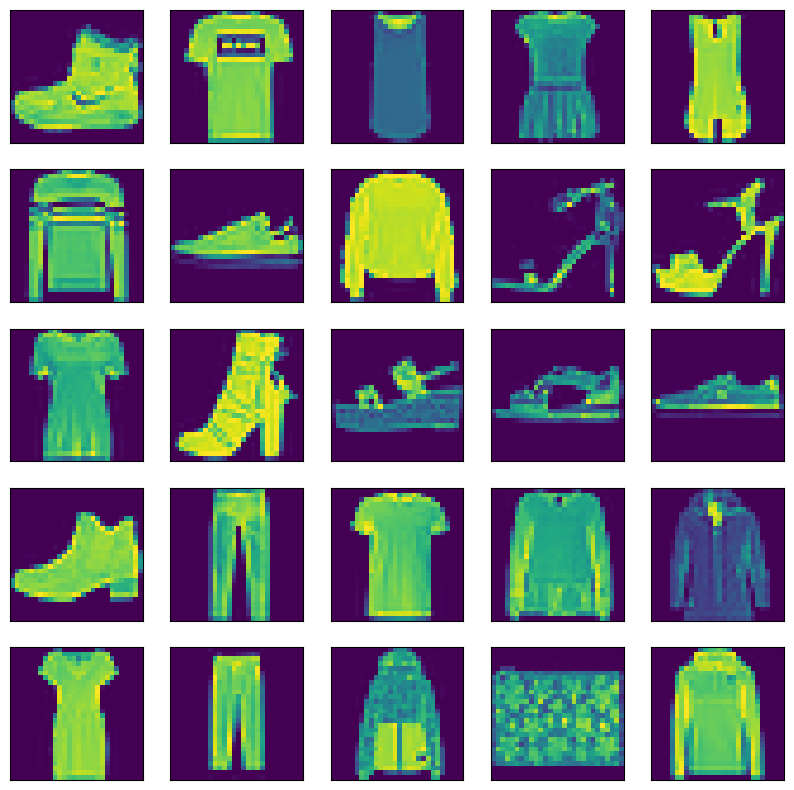

(60000, 784)
(60000,)
(48000, 784)
(48000,)
(12000, 784)
(12000,)
(10000, 784)
(10000,)


In [3]:
# Load the Fashion-MNIST dataset
(X_temp, y_temp), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Plot the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_temp[i])
plt.show()

# Reshape and rescale into [0,1] values for better computation
X_temp = X_temp.reshape(X_temp.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Spilt the train set into train set and validation set with a porportion of 80:20
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

print(X_temp.shape)
print(y_temp.shape)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

# 2. Try different hyperparameters C and $\gamma$ for Linear kernel and RBF kernel

In [3]:
# List of values to try for C
C_values = [0.1, 1, 10]

# List of values to try for gamma
gamma_values = [0.001, 0.01, 0.1]

linear_error = []
rbf_error = []

# Linear kernel
for C in C_values:
    # Train the model
    start_time = time.time()
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    end_time = time.time()

    # Make predictions
    train_preds = clf.predict(X_train)
    val_preds = clf.predict(X_val)

    # Calculate errors
    train_error = 1 - accuracy_score(y_train, train_preds)
    val_error = 1 - accuracy_score(y_val, val_preds)
    linear_error.append((train_error, val_error))
    # Print results
    print(f"Linear SVM with C={C}: train error={train_error}, val error={val_error}, time={end_time-start_time}s")

# RBF kernel
for C in C_values:
    for gamma in gamma_values:
        # Train the model
        start_time = time.time()
        clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        end_time = time.time()

        # Make predictions
        train_preds = clf.predict(X_train)
        val_preds = clf.predict(X_val)

        # Calculate errors
        train_error = 1 - accuracy_score(y_train, train_preds)
        val_error = 1 - accuracy_score(y_val, val_preds)
        rbf_error.append((train_error, val_error))

        # Print results
        print(f"RBF SVM with C={C}, gamma={gamma}: train error={train_error}, val error={val_error}, time={end_time-start_time}s")


Linear SVM with C=0.1: train error=0.040583333333333305, val error=0.056916666666666615, time=103.94739556312561s
Linear SVM with C=1: train error=0.027000000000000024, val error=0.0648333333333333, time=120.7997498512268s
Linear SVM with C=10: train error=0.01579166666666665, val error=0.07333333333333336, time=192.57639479637146s
RBF SVM with C=0.1, gamma=0.001: train error=0.09787500000000005, val error=0.09591666666666665, time=554.6318941116333s
RBF SVM with C=0.1, gamma=0.01: train error=0.04683333333333328, val error=0.04808333333333337, time=280.46695613861084s
RBF SVM with C=0.1, gamma=0.1: train error=0.3024375, val error=0.3560833333333333, time=1372.8002908229828s
RBF SVM with C=1, gamma=0.001: train error=0.06370833333333337, val error=0.06366666666666665, time=206.57252717018127s
RBF SVM with C=1, gamma=0.01: train error=0.014958333333333296, val error=0.02558333333333329, time=113.55971693992615s
RBF SVM with C=1, gamma=0.1: train error=0.00010416666666668295, val error=

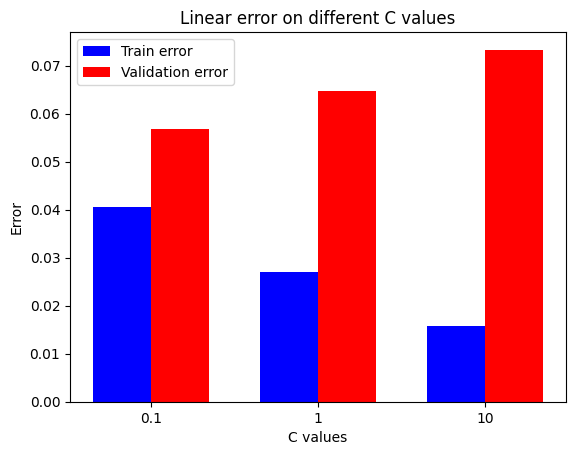

In [10]:
# Separate the tuples into two lists
x_values = [x[0] for x in linear_error]
y_values = [x[1] for x in linear_error]

# Create a new figure
plt.figure()

# Create bar chart
bar_width = 0.35
index = np.arange(len(x_values))

bar1 = plt.bar(index, x_values, bar_width, color='b', label='Train error')
bar2 = plt.bar(index + bar_width, y_values, bar_width, color='r', label='Validation error')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('C values')
plt.ylabel('Error')
plt.title('Linear error on different C values')

# xticks
plt.xticks(index + bar_width / 2, ('0.1', '1', '10'))

# Show the plot
plt.show()


### a. Evaluating the performance of Linear kernel:
As C increases, the model becomes more complex (less regularization), which can lead to overfitting. This is evident in the results where the training error decreases and the validation error increases as C increases. This change suggests that the model is getting better at fitting to the training data, but also getting worse at generalizing to unseen data (validation data).

Also, the time taken for training increases with C because the more complex a model is, the more computational resources is required to train that model.

Therefore, based on these results, $C=0.1$ seems to provide the best balance with respect to all of these factors: training error, validation error and training time.

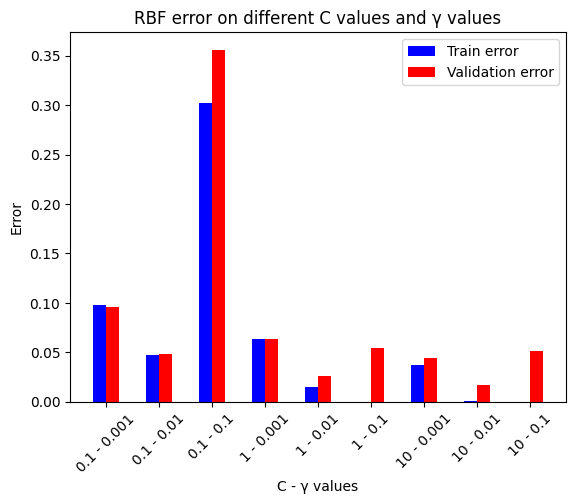

In [25]:
# Separate the tuples into two lists
x_values = [x[0] for x in rbf_error]
y_values = [x[1] for x in rbf_error]

# Create a new figure
plt.figure()

# Create bar chart
bar_width = 0.25
index = np.arange(len(x_values))

bar1 = plt.bar(index, x_values, bar_width, color='b', label='Train error')
bar2 = plt.bar(index + bar_width, y_values, bar_width, color='r', label='Validation error')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('C - \u03B3 values')
plt.ylabel('Error')
plt.title('RBF error on different C values and \u03B3 values')

# xticks
plt.xticks(index + bar_width/2, ('0.1 - 0.001', '0.1 - 0.01', '0.1 - 0.1', '1 - 0.001', '1 - 0.01', '1 - 0.1', '10 - 0.001', '10 - 0.01', '10 - 0.1'), rotation = 45)

# Show the plot
plt.show()


### b. Evaluating the performance of RBF kernel:
As C and $\gamma$ increase, the model becomes more complex, which can lead to overfitting. This is evident in the results where the training error generally decreases with increasing C and gamma, but the validation error does NOT always decrease. This suggests that the model is fitting the training data more closely, but its ability to generalize to unseen data is not always improving.

Also, the time taken for training generally increases with C and $\gamma$ because a more complex model requires more computational resources to train.

Therefore, based on these results, $C=10$ and $\gamma=0.01$ seem to provide the best balance between training error, validation error, and training time.

### Conclusion:
- For the linear kernel, we select $C=0.1$ as the best parameter
- For the RBF kernel, we select $C=10$ and $\gamma=0.01$ as the best parameters

# 3. Select the best hyperparameter values and test their performance on the test set

In [3]:
# Testing on the best Linear hyperparameter
start_time = time.time()
clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(X_temp, y_temp)
end_time = time.time()

train_preds = clf.predict(X_temp)
test_preds = clf.predict(X_test)

train_error = 1 - accuracy_score(y_temp, train_preds)
test_error = 1 - accuracy_score(y_test, test_preds)
print(f"Linear SVM with C={0.1}: train error={train_error}, test error={test_error}, time={end_time-start_time}s")

# Testing on the best RBF hyperparameters
start_time = time.time()
clf = svm.SVC(kernel='rbf', C=10, gamma=0.01)
clf.fit(X_temp, y_temp)
end_time = time.time()

train_preds = clf.predict(X_temp)
test_preds = clf.predict(X_test)

train_error = 1 - accuracy_score(y_temp, train_preds)
test_error = 1 - accuracy_score(y_test, test_preds)
print(f"RBF SVM with C={10} and \u03B3={0.01}: train error={train_error}, test error={test_error}, time={end_time-start_time}s")

Linear SVM with C=0.1: train error=0.1111833333333333, val error=0.14390000000000003, time=251.6508686542511s
RBF SVM with C=10 and δ=0.01: train error=0.029266666666666663, val error=0.10009999999999997, time=235.39492440223694s


### Comment:
- We selected the best hyperparameters and retrained the model on the full-size train set (60000 images) and get a train error of 0.11 for Linear SVM and 0.02 for RBF SVM
- As for the test set, the error is 0.14 for Linear SVM and 0.1 for RBF SVM
- The time cost for each kernel is approximately 240 seconds, which is pretty high. It indicates that we should use the train set differently, let's say like split them in batches and train each of the batches at a time.

# 4. Using other method on the same dataset

## Convoluted Neural Network (CNN)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

(X_temp, y_temp), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Reshape the data to include the channel dimension
X_temp = X_temp.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical
y_temp = tf.keras.utils.to_categorical(y_temp, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

start_time = time.time()
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_temp, y_temp, epochs=10, batch_size=128, validation_data=(X_val, y_val))
end_time = time.time()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test error: {1-test_acc}')
print(f'Time cost: {end_time-start_time}')

Epoch 1/10
469/469 [==============================] - 11s 22ms/step - loss: 0.7621 - accuracy: 0.7869 - val_loss: 0.3995 - val_accuracy: 0.8545
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.3690 - accuracy: 0.8676 - val_loss: 0.3263 - val_accuracy: 0.8860
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.3162 - accuracy: 0.8851 - val_loss: 0.2716 - val_accuracy: 0.9011
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2807 - accuracy: 0.8969 - val_loss: 0.2588 - val_accuracy: 0.9039
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2600 - accuracy: 0.9042 - val_loss: 0.2360 - val_accuracy: 0.9095
Epoch 6/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2389 - accuracy: 0.9114 - val_loss: 0.2475 - val_accuracy: 0.9082
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.2234 - accuracy: 0.9179 - val_loss: 0.2057 - val_accuracy:

### Comment on CNN's performance:
- The test error value of CNN is in-between that of Linear SVM and RBF SVM
- The execute time of CNN is significantly less than that of Linear SVM and RBF SVM
$\Rightarrow$ This shows the power of CNN incomparison to the former two. It gains a test error that is nearly equals to the other 2 models whereas having lesser performance time. Needless to say, when it comes to image processing in large sizes, CNN is the superior option.